## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final_Project_IDX/loan_data_2007_2014.csv', sep = ',')
df.sample(5)

<ipython-input-3-d775f914eb35>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Final_Project_IDX/loan_data_2007_2014.csv', sep = ',')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
436160,436160,12336539,14328683,8000,8000,8000.0,36 months,12.99,269.52,B,...,NaN,NaN,NaN,NaN,NaN,NaN,7900.0,NaN,NaN,NaN
99213,99213,6809488,8431155,3500,3500,3500.0,36 months,7.90,109.52,A,...,NaN,NaN,NaN,NaN,NaN,NaN,20500.0,NaN,NaN,NaN
179083,179083,2379152,2841650,12375,12375,12375.0,36 months,15.31,430.87,C,...,NaN,NaN,NaN,NaN,NaN,NaN,8400.0,NaN,NaN,NaN
191964,191964,1603806,1875002,8000,8000,8000.0,36 months,7.90,250.33,A,...,NaN,NaN,NaN,NaN,NaN,NaN,14300.0,NaN,NaN,NaN
66363,66363,8646908,10418863,33425,33425,33425.0,60 months,21.70,917.47,E,...,NaN,NaN,NaN,NaN,NaN,NaN,5500.0,NaN,NaN,NaN


## Explatory Data Analyst

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

Berdasarkan informasi yang di atas
* Terdapat 75 variabel dengan 466285 baris
* Terdapat 17 kolom yang tidak memiliki nilai
* Terdapat 20 kolom yang memiliki nilai null
* 46 kolom bertipe float
* 7 kolom bertipe integer
* 22 kolom bertipe object


Untuk meminimalisasi komputasi maka saya memilih variabel - Variabel yang akan digunakan sebagai berikut :<br>


| Variabel |           Deskripsi            |
| -------- | ------------------------------ |
| term | Jumlah Pembayaran Pinjaman
| grade | Nilai Peminjam |
| home_ownership | Status Kepemilikan Rumah |
| annual_inc | Pendapatan Tahunan |
| dti | Rasio Utang Terhadap Pendapatan |
| open_acc | Batas Penerimaan Pengajuan Kredit |
  revol_util | Rasio Perputan Kredit Peminjam |
| funded_amnt | Jumlah Pinjaman |
| sub_grade | Detail Nilai Pinjaman|
| emp_length | Lamanya Peminjam Bekerja|
| inq_last_6mths| Jumlah Pertanyaan 6 Bulan Terakhir(Tidak Termasuk Penyelidikan Mobil dan Hipotek)
| Verification_status| Status verifikasi peminjam|
| loan_amnt| Jumlah Pinjaman |
| int_rate |Suku Bunga|
| total_acc|Jumlah Yang Meminjam|
| total_pymnt| Total Pembayaran|

Target dalam penelitian ini adalah : <br>


| Variabel | Deskripsi |
|----------|------------|
| loan_status| Status Peminjam|

In [ ]:
df1 = df[['term','grade','sub_grade','home_ownership','annual_inc','dti',
          'open_acc','revol_util','funded_amnt','emp_length',
          'inq_last_6mths','loan_status','verification_status',
          'loan_amnt','int_rate','total_acc','total_pymnt']]

df1.sample(5)

,term,grade,sub_grade,home_ownership,annual_inc,dti,open_acc,revol_util,funded_amnt,emp_length,inq_last_6mths,loan_status,verification_status,loan_amnt,int_rate,total_acc,total_pymnt
188159,36 months,A,A1,RENT,40000.0,5.69,6.0,18.4,8000,< 1 year,0.0,Fully Paid,Not Verified,8000,6.03,8.0,8276.650000
45760,60 months,C,C5,MORTGAGE,70000.0,26.73,11.0,55.9,16000,3 years,0.0,Current,Source Verified,16000,16.24,26.0,9387.140000
377371,60 months,D,D4,RENT,90000.0,9.07,7.0,31.3,35000,10+ years,0.0,Current,Source Verified,35000,17.57,19.0,16731.590000
401377,36 months,B,B1,MORTGAGE,58000.0,3.21,10.0,34.4,6000,6 years,2.0,Fully Paid,Verified,6000,9.67,34.0,6313.695068
371369,60 months,D,D5,MORTGAGE,65000.0,14.84,4.0,83.9,29850,10+ years,2.0,Current,Source Verified,29850,18.24,7.0,14476.100000


### Melihat Nilai Null

In [ ]:
df1.isna().sum()

term                       0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 4
dti                        0
open_acc                  29
revol_util               340
funded_amnt                0
emp_length             21008
inq_last_6mths            29
loan_status                0
verification_status        0
loan_amnt                  0
int_rate                   0
total_acc                 29
total_pymnt                0
dtype: int64

### Melihat Data Duplikat

In [ ]:
df1.duplicated().sum()

0

### Melihat Data Imbalance

In [ ]:
# melihat persentase nilai loan_status
df1['loan_status'].value_counts()/ len(df1) *100

loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: count, dtype: float64

<ipython-input-10-8377a8a977fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df1, x = 'loan_status', order=df1['loan_status'].value_counts().index, palette='rocket')


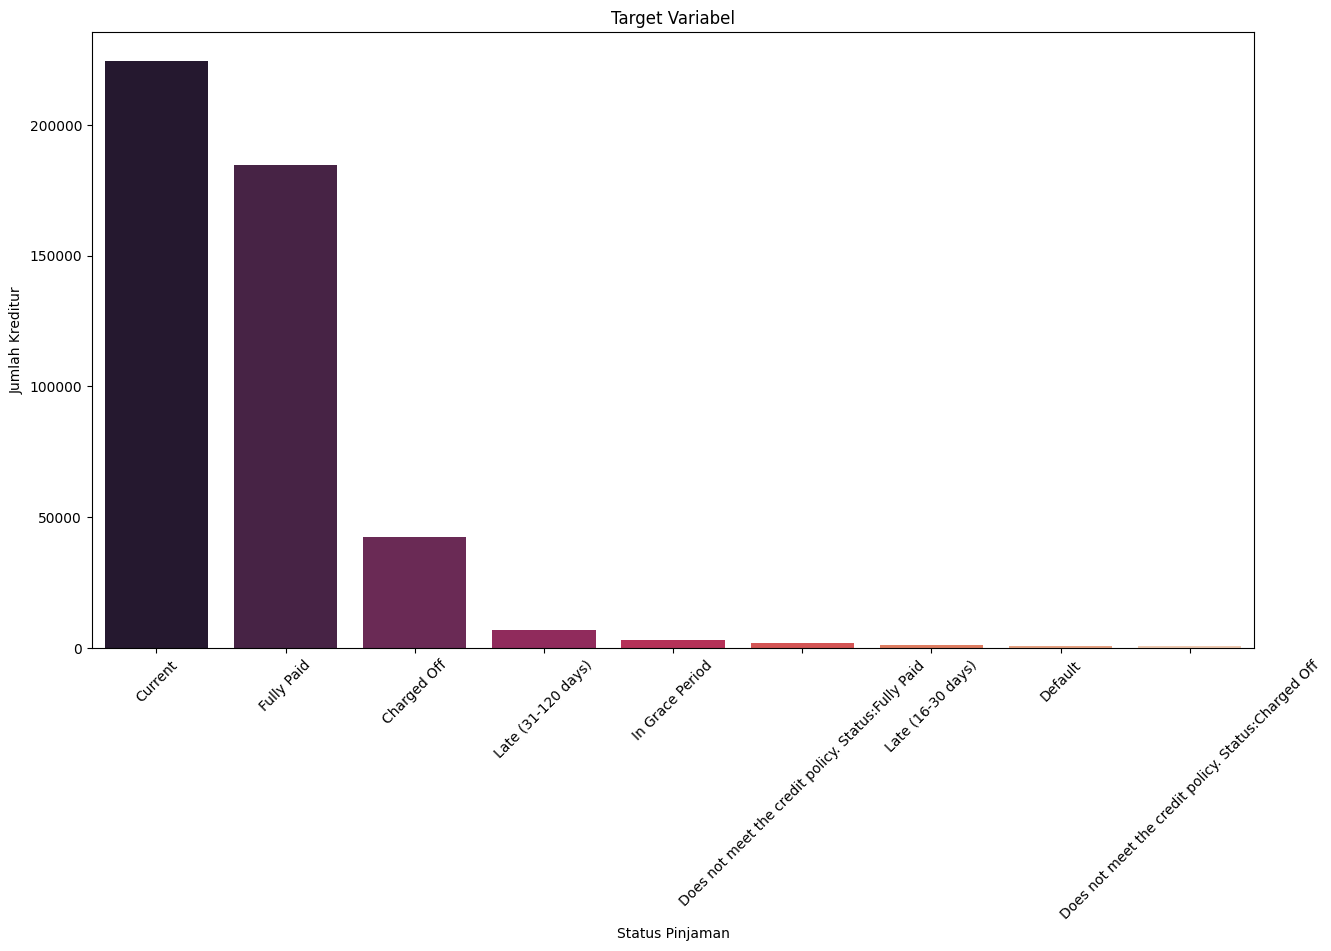

In [ ]:
# membuat Visualisasi
plt.figure(figsize=(15,8))
sns.countplot(data = df1, x = 'loan_status', order=df1['loan_status'].value_counts().index, palette='rocket')
plt.title('Target Variabel')
plt.xticks(rotation = 45)
plt.ylabel('Jumlah Kreditur')
plt. xlabel('Status Pinjaman')
plt.show()

Berdasarkan informasi diatas
* Terdapat nilai null pada kolom open_acc, inq_last_6mnth, revol_util dan empy_length
* Tidak memiliki nilai duplikat
* Terindikasi adanya class imbalance pada data kredit lancar dan kredit macet

### Analisi Univariet

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   term                 466285 non-null  object 
 1   grade                466285 non-null  object 
 2   sub_grade            466285 non-null  object 
 3   home_ownership       466285 non-null  object 
 4   annual_inc           466281 non-null  float64
 5   dti                  466285 non-null  float64
 6   open_acc             466256 non-null  float64
 7   revol_util           465945 non-null  float64
 8   funded_amnt          466285 non-null  int64  
 9   emp_length           445277 non-null  object 
 10  inq_last_6mths       466256 non-null  float64
 11  loan_status          466285 non-null  object 
 12  verification_status  466285 non-null  object 
 13  loan_amnt            466285 non-null  int64  
 14  int_rate             466285 non-null  float64
 15  total_acc        

In [ ]:
# memisahkan kolom numerik dan melihat ringkasan data
nums = df1.select_dtypes(exclude='object').columns
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.000000,63000.000000,88960.00000,7.500000e+06
dti,466285.0,17.218758,7.851121,0.00,11.360000,16.870000,22.78000,3.999000e+01
open_acc,466256.0,11.187069,4.987526,0.00,8.000000,10.000000,14.00000,8.400000e+01
revol_util,465945.0,56.176947,23.732628,0.00,39.200000,57.600000,74.70000,8.923000e+02
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.000000,0.000000,1.00000,3.300000e+01
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
int_rate,466285.0,13.829236,4.357587,5.42,10.990000,13.660000,16.49000,2.606000e+01
total_acc,466256.0,25.064430,11.600141,1.00,17.000000,23.000000,32.00000,1.560000e+02
total_pymnt,466285.0,11540.686220,8265.627112,0.00,5552.125349,9419.250943,15308.15846,5.777758e+04


<ipython-input-13-452395f768c3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[nums[i]], kde=True)
<ipython-input-13-452395f768c3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[nums[i]], kde=True)
<ipython-input-13-452395f768c3>:6: UserWarning: 

`distplot` is a deprecated function 

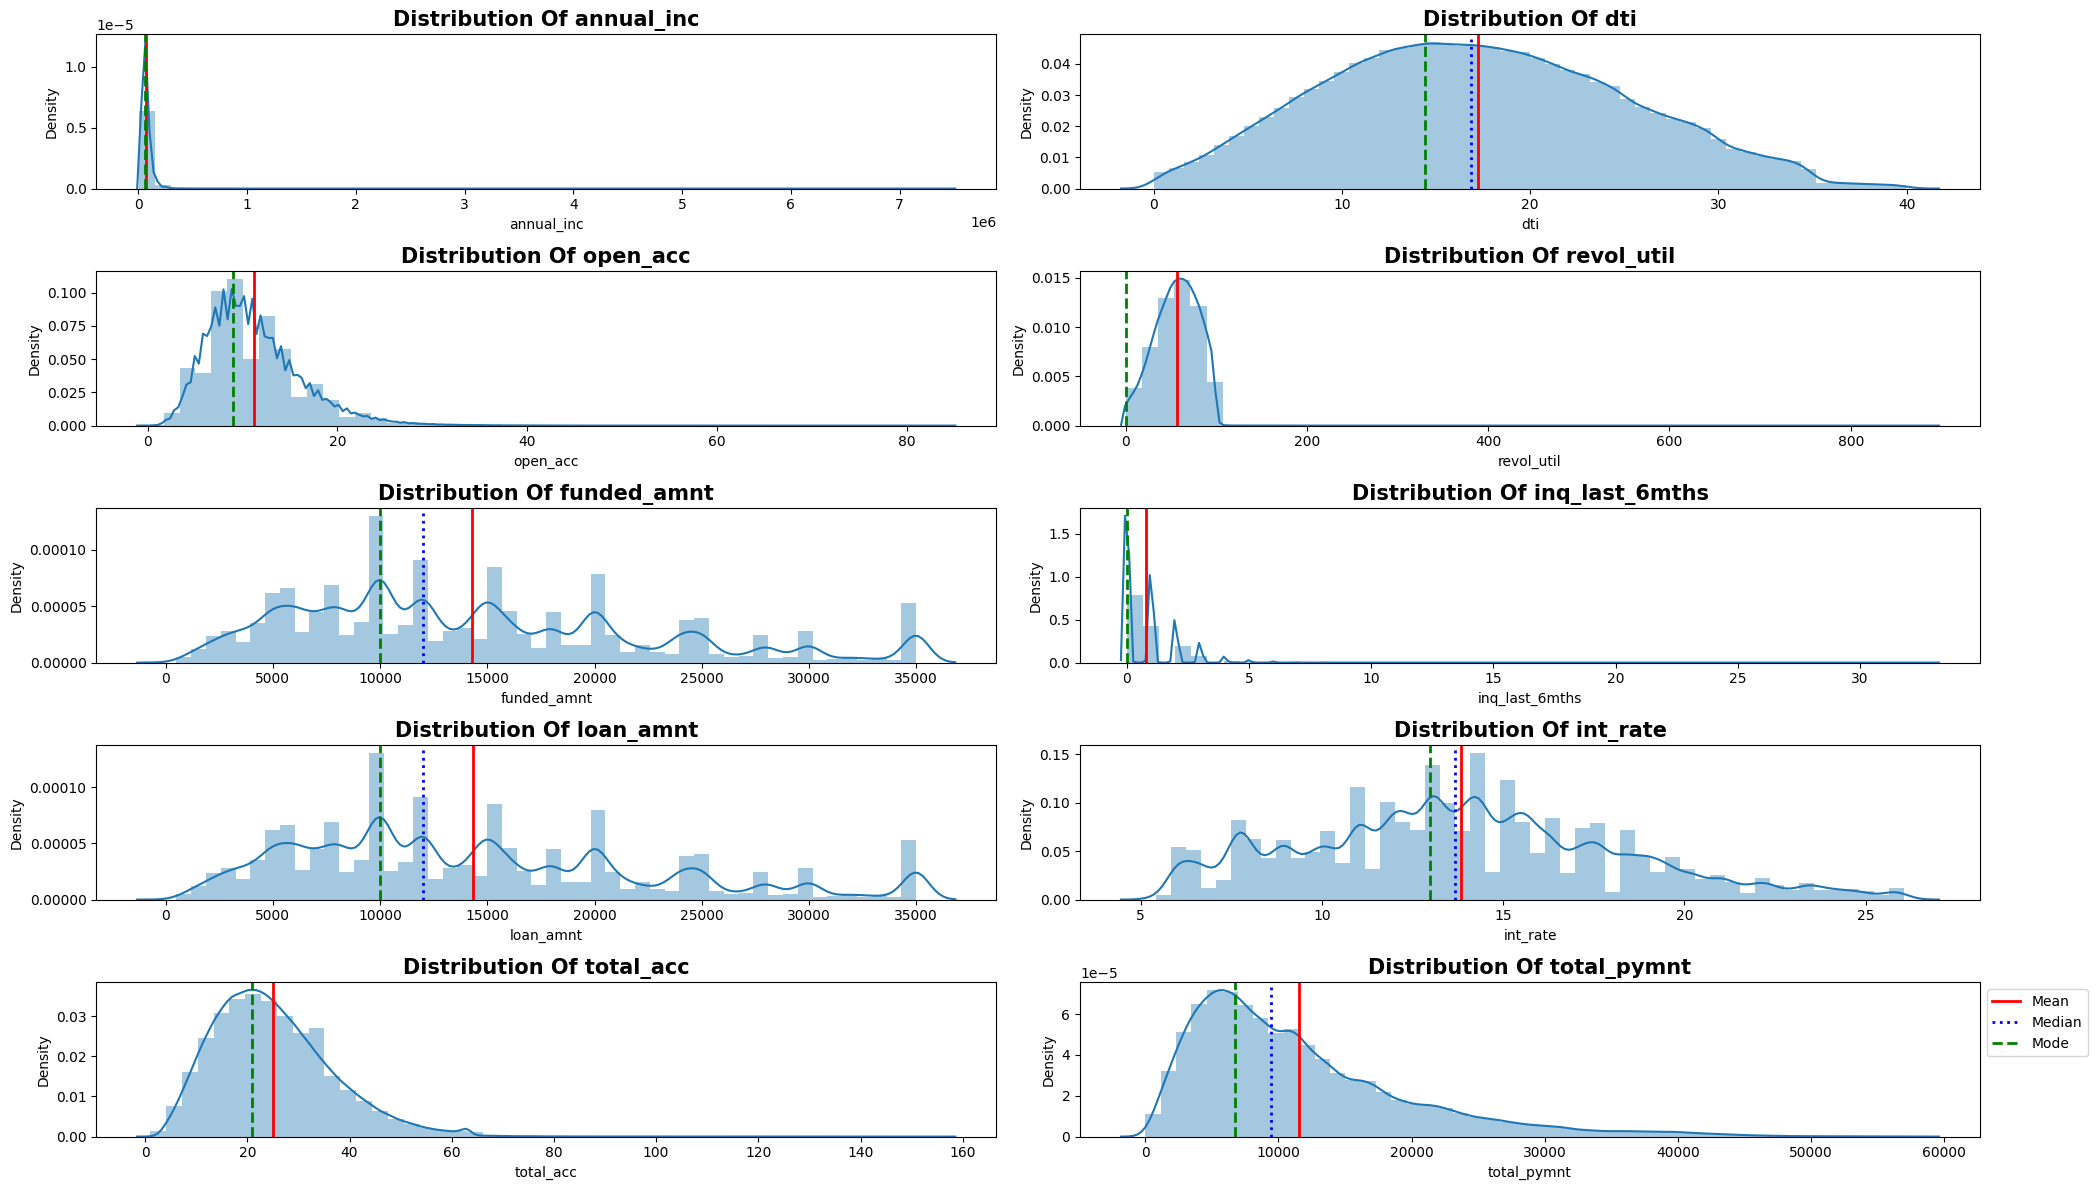

In [ ]:
# Visualisasi pesebaran data numerik menggunakan displot
plt.figure(figsize=(20, 12))
for i in range(0, len(nums)):

    plt.subplot(5, 2, i+1)
    sns.distplot(df1[nums[i]], kde=True)
    plt.tight_layout()

    average = np.mean(df1[nums[i]])
    median = np.median(df1[nums[i]])
    mode = df1[nums[i]].mode().values[0]

    plt.axvline(average, color='red', linestyle='solid',
                linewidth=2, label='Mean')
    plt.axvline(median, color='blue', linestyle='dotted',
                linewidth=2, label='Median')
    plt.axvline(mode, color='green', linestyle='dashed',
                linewidth=2, label='Mode')
    plt.title('Distribution Of ' + nums[i], fontsize=15, fontweight='bold')
    plt.legend().set_visible(False)
    plt.tight_layout()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

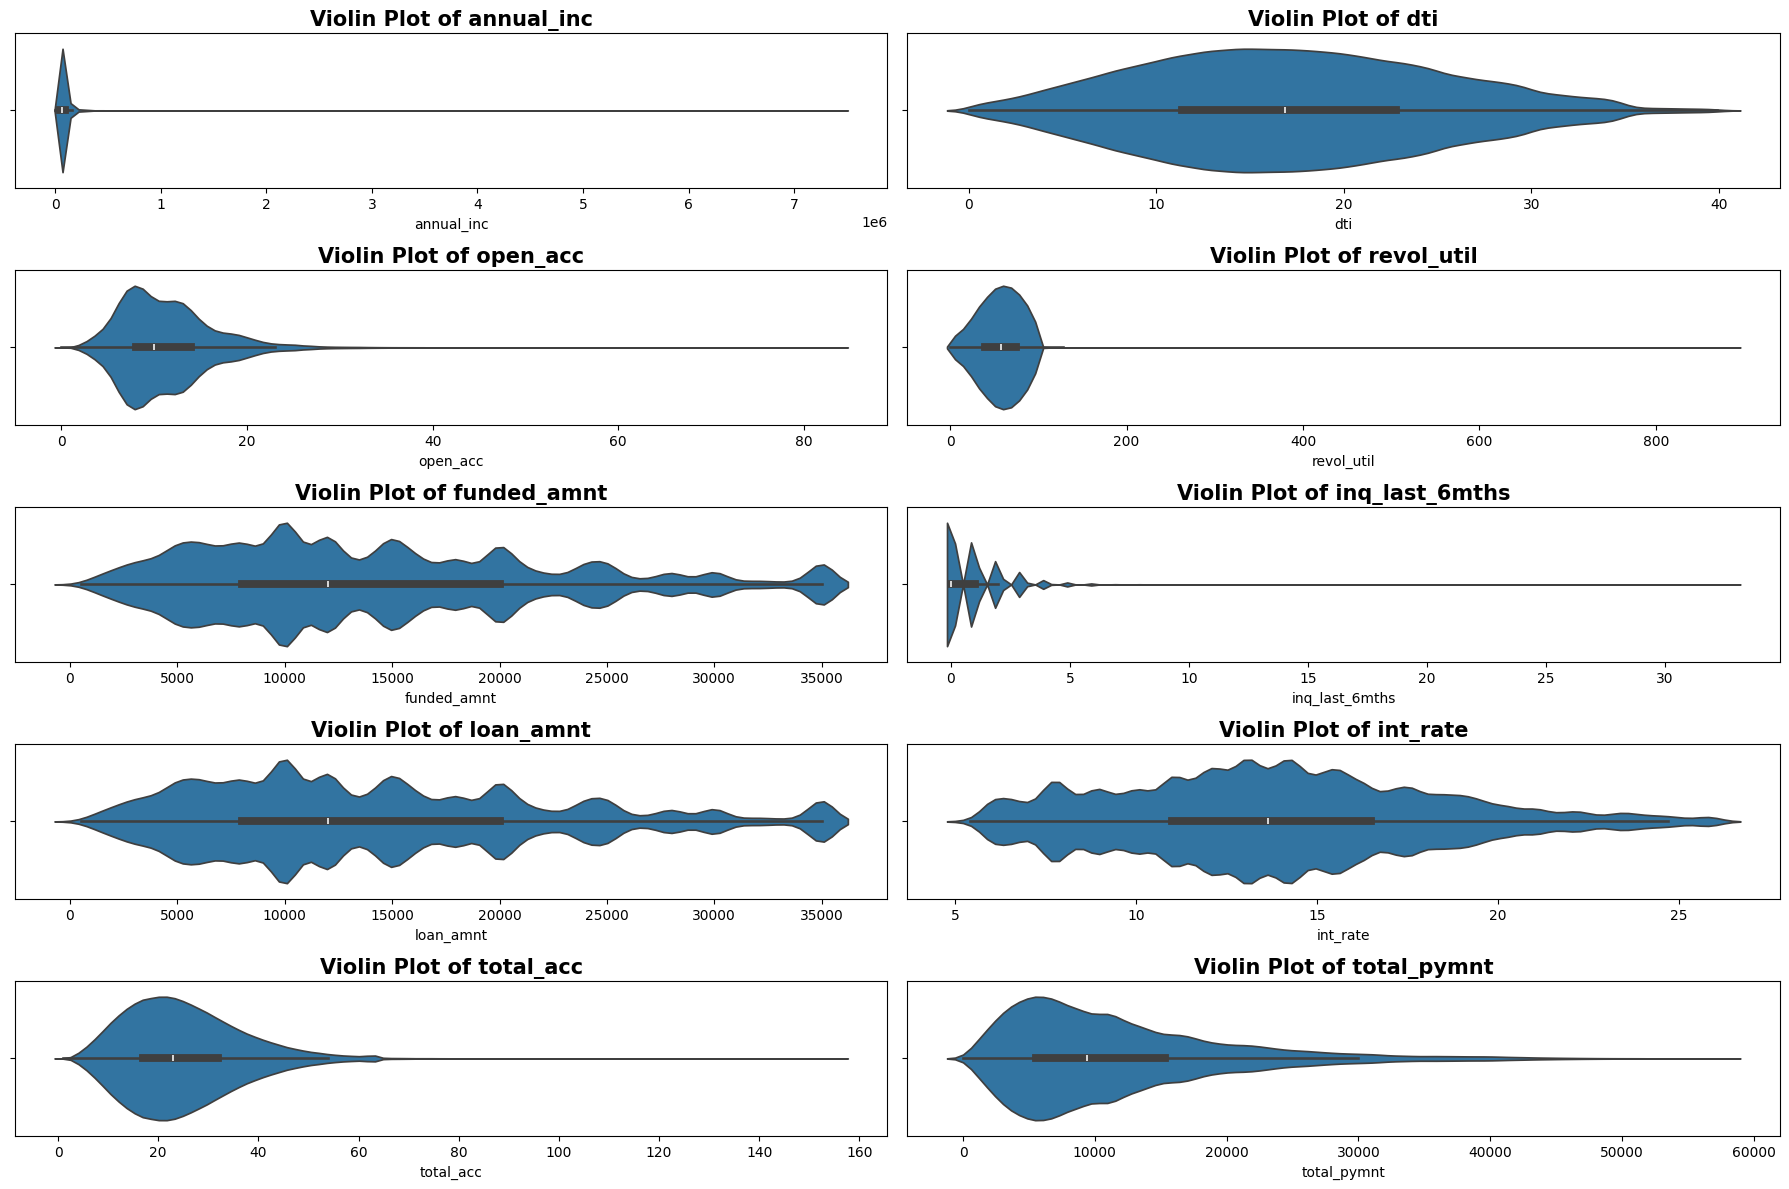

In [ ]:
# Melihat outlier pada data numerik
plt.figure(figsize=(18, 12))
for i in range(0, len(nums)):
    plt.subplot(5, 2, i+1)
    sns.violinplot(x=df1[nums[i]], orient='h')
    plt.title('Violin Plot of ' + nums[i], fontsize=15, fontweight='bold')
    plt.tight_layout()

plt.show()

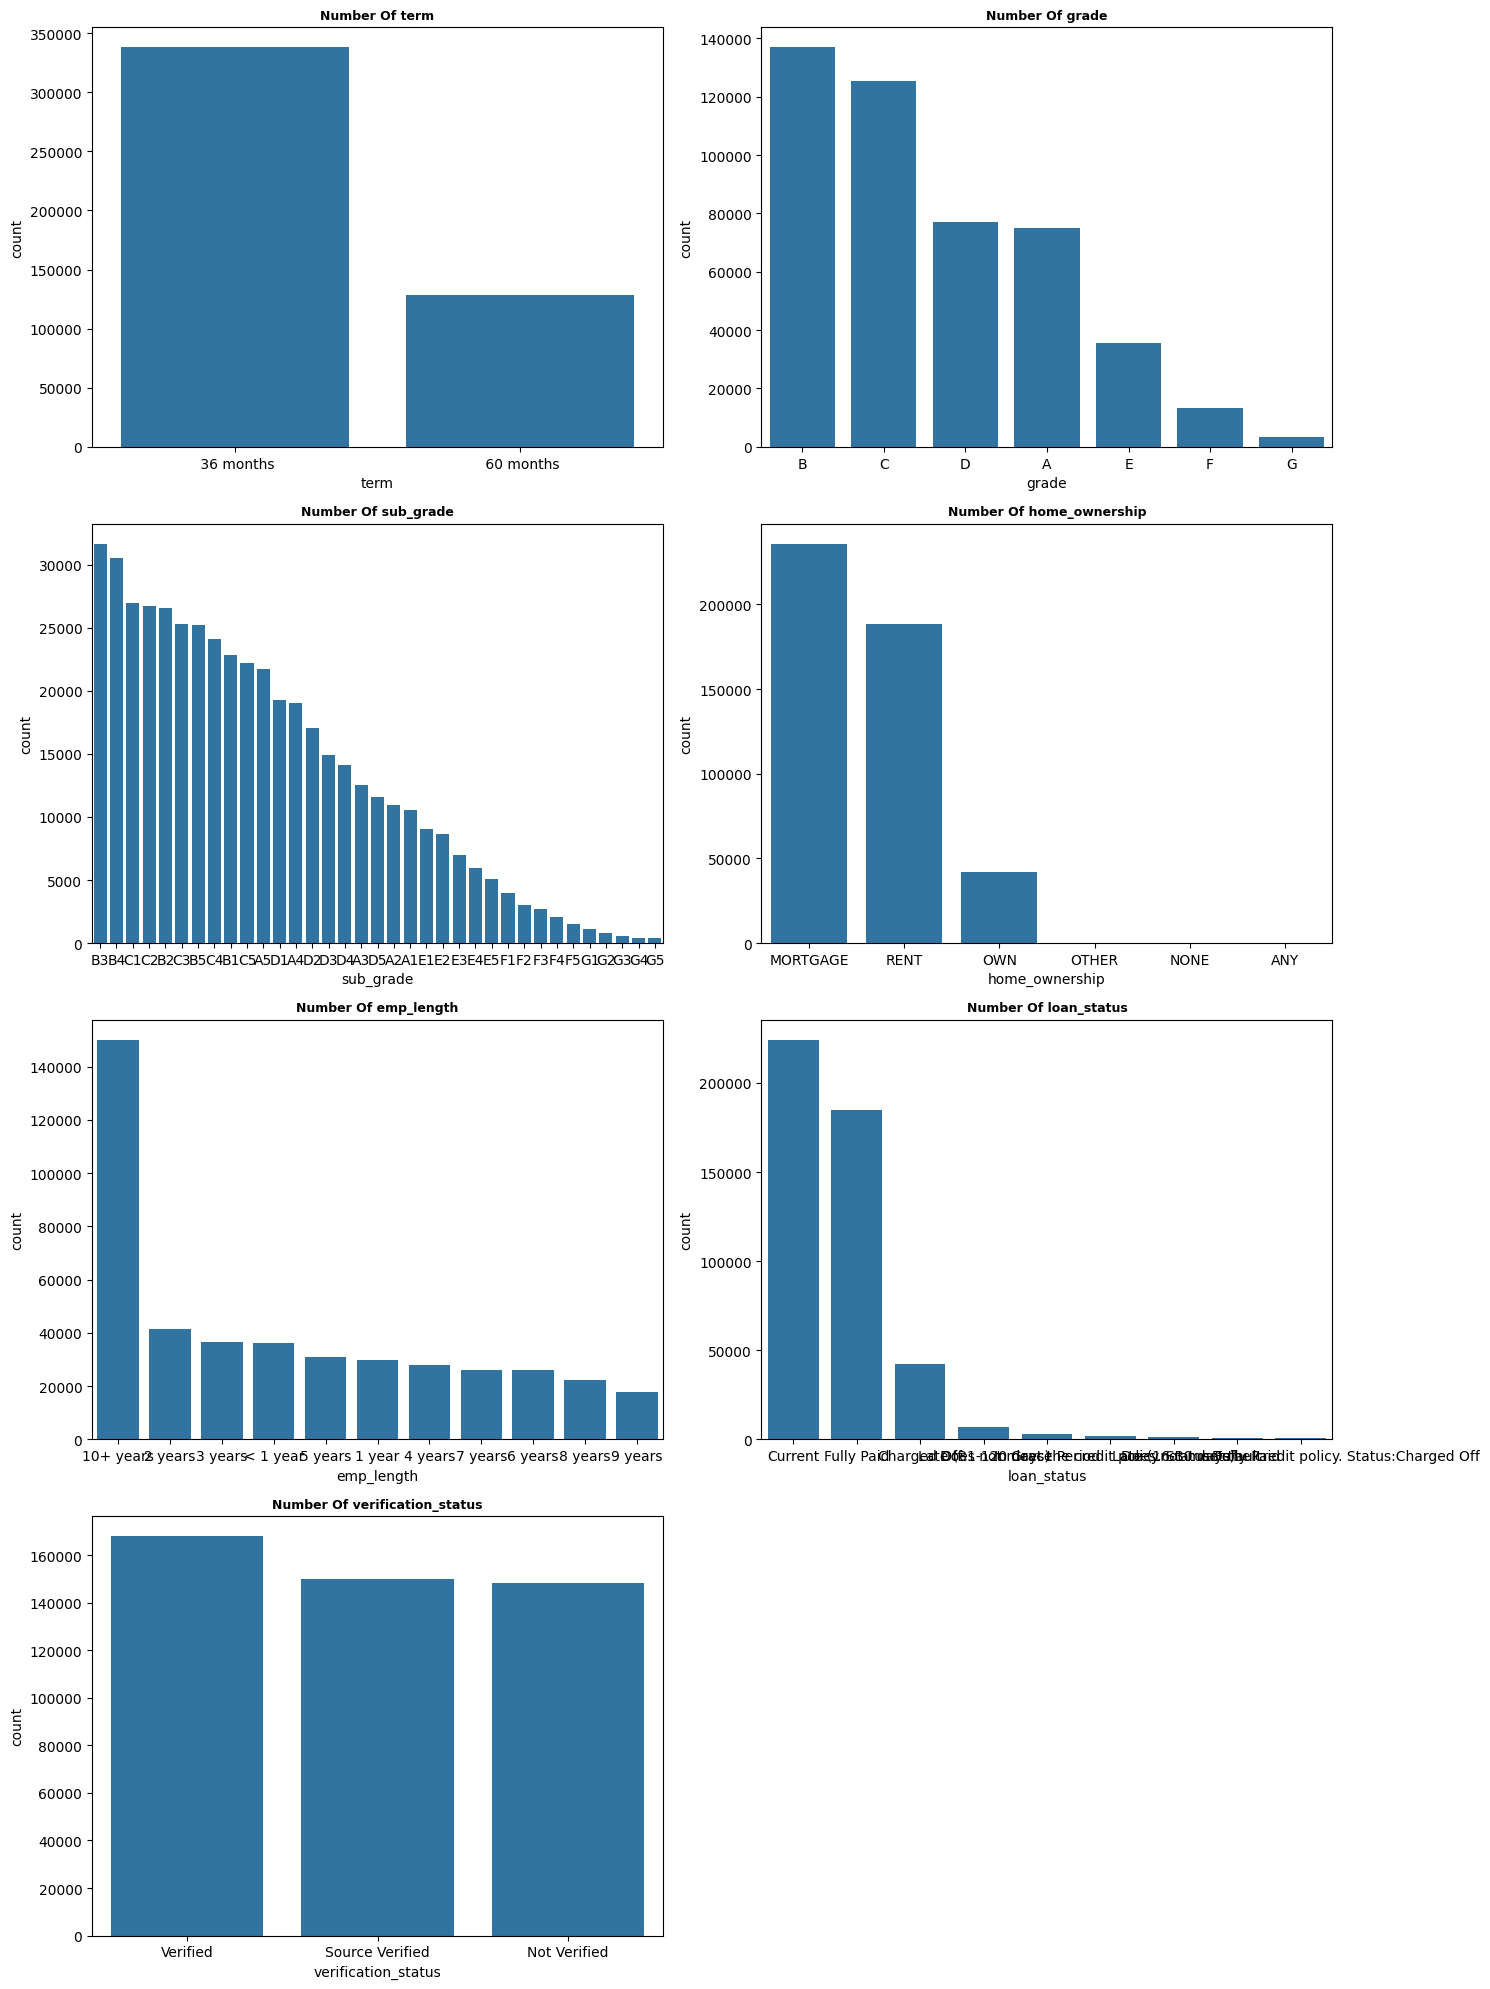

In [ ]:
# Memisahkan data kategori
cats = df1.select_dtypes(include='object').columns

# Melakukan Visualisasi

plt.figure(figsize=(15, 20))
for i in range(0, len(cats)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df1[cats[i]], order=df1[cats[i]].value_counts().index,)
    plt.title('Number Of ' + cats[i], fontsize=9, fontweight='bold')
    plt.tight_layout()

plt.show()


Berdasarkan informasi diatas, dapat disimpulkan sebagai berikut:
Variabel Numerik <br>
* Distribusi data
  * variabel dti dan funded_mnt berdistribusi normal
  * variabel annual_inc, open_acc, revol_until dan inq_last_6mths tidak berdistribusi normal dan memiliki skewed positif
* Outlier
  Variabel annual_inc,revol_until,open_acc dan inq_last_6mths terindikisi terdapat outlier

Variabel Kategorik <br>
* Pada variabel term, peminjam banyak meminjam dengan jangka waktu 36 bulan
* Pada variabel grade, jumlah grade B paling banyak.
* Pada variabel subgrade, jumlah subgrade B3 paling banyak.
* Pada varaibel home_ownership, kepemilikan rumah Mortagage atau KPR memiliki niai tertinggi.
* Pada variabel empy_length, lama kerja peminjam paling banyak 10 tahun
* Pada variabel status pinjaman current paling tinggi, hal ini menandakan banyak peminjam yang membayar tepat waktu.
* Pada varaibel verification_status, peminjam sudah terverifikasi.

### Analisis Bivariet

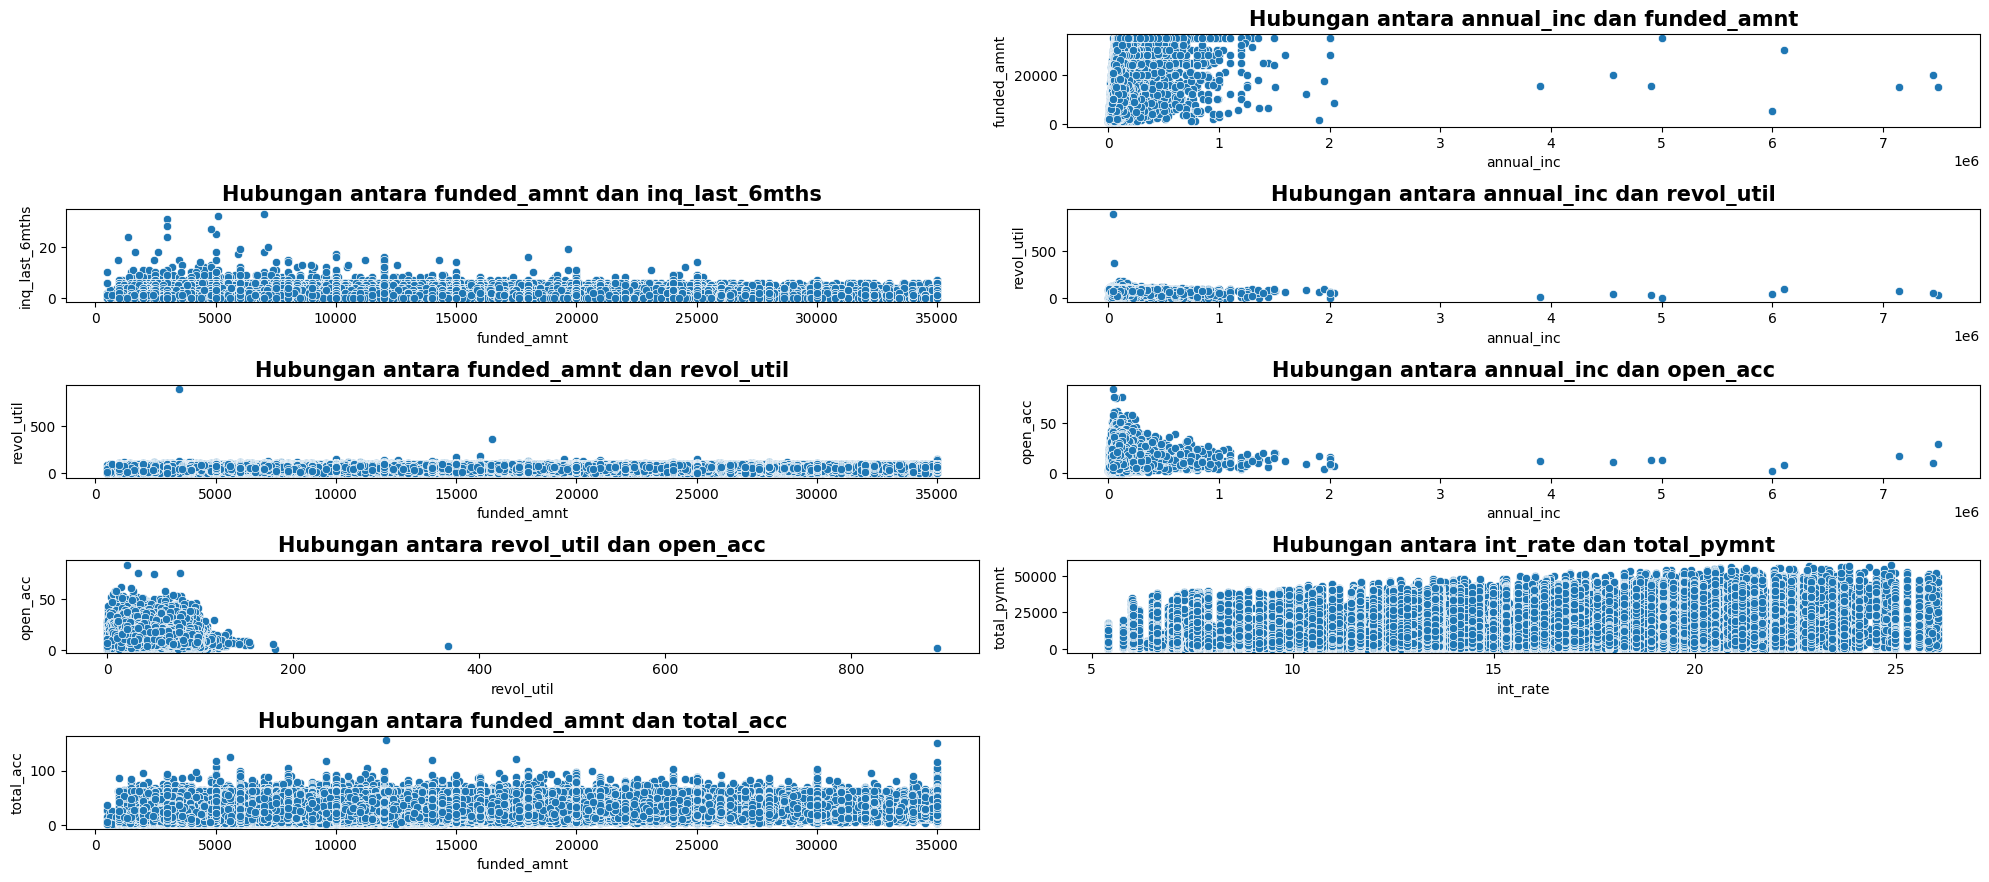

In [ ]:
# Hubungan antar variabel numerik

pairs = [('annual_inc', 'funded_amnt'),
         ('funded_amnt', 'inq_last_6mths'),
         ('annual_inc', 'revol_util'),
         ('funded_amnt', 'revol_util'),
         ('annual_inc', 'open_acc'),
         ('revol_util', 'open_acc'),
         ('int_rate','total_pymnt'),
         ('funded_amnt','total_acc')]

plt.figure(figsize=(20, 12))

for i, (x_col, y_col) in enumerate(pairs, 1):
    plt.subplot(7, 2, i+1)
    sns.scatterplot(x=df1[x_col], y=df1[y_col])
    plt.title(f'Hubungan antara {x_col} dan {y_col}', fontsize=15, fontweight='bold')
    plt.tight_layout()


plt.show()

In [ ]:
# Hubungan Antar Variabel Kategorik menggunakan chi square
import scipy.stats as stats

chi_tab = pd.crosstab(index=df1['term'], columns=df1['loan_status'])
chi2, p_val, _, _ = stats.chi2_contingency(chi_tab)
print("Nilai p-value untuk hubungan antara jangka waktu pinjaman dan status_pinjaman:", p_val)

chi_tab = pd.crosstab(index=df1['emp_length'], columns=df['loan_status'])
chi2, p_val, _, _ = stats.chi2_contingency(chi_tab)
print("Nilai p-value untuk hubungan antara lama bekerja dan status_pinjaman:", p_val)

chi_tab = pd.crosstab(index=df['grade'], columns=df['loan_status'])
chi2, p_val, _, _ = stats.chi2_contingency(chi_tab)
print("Nilai p-value untuk hubungan antara pekerjaan dan status_pinjaman:", p_val)

chi_tab = pd.crosstab(index=df['sub_grade'], columns=df['loan_status'])
chi2, p_val, _, _ = stats.chi2_contingency(chi_tab)
print("Nilai p-value untuk hubungan antara kepemilikan_rumah dan status_pinjaman:", p_val)

chi_tab = pd.crosstab(index=df['home_ownership'], columns=df['loan_status'])
chi2, p_val, _, _ = stats.chi2_contingency(chi_tab)
print("Nilai p-value untuk hubungan antara kepemilikan_rumah dan status_pinjaman:", p_val)

Nilai p-value untuk hubungan antara jangka waktu pinjaman dan status_pinjaman: 0.0
Nilai p-value untuk hubungan antara lama bekerja dan status_pinjaman: 0.0
Nilai p-value untuk hubungan antara pekerjaan dan status_pinjaman: 0.0
Nilai p-value untuk hubungan antara kepemilikan_rumah dan status_pinjaman: 0.0
Nilai p-value untuk hubungan antara kepemilikan_rumah dan status_pinjaman: 0.0


In [ ]:
#Hubungan Antara Variabel Status Pinjaman dengan Total Pendapatan Tahunan

groups={}

for status in df['loan_status'].unique():
    groups[status] = df[df['loan_status'] == status]['annual_inc']

f_statistic, p_value = stats.f_oneway(*groups.values())

alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan dalam total pendapatan tahunann antara kelompok status pinjaman.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam total pendapatan tahunan antara kelompok status pinjaman.")

Tidak terdapat perbedaan yang signifikan dalam total pendapatan tahunan antara kelompok status pinjaman.


In [ ]:
#Hubungan Antara Variabel Status Pinjaman dengan Jumlah Pinjaman

groups={}

for status in df['loan_status'].unique():
    groups[status] = df[df['loan_status'] == status]['funded_amnt']

f_statistic, p_value = stats.f_oneway(*groups.values())

alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan dalam total pinjaman antara kelompok status pinjaman.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam total pinjaman antara kelompok status pinjaman.")

Terdapat perbedaan yang signifikan dalam total pinjaman antara kelompok status pinjaman.


In [ ]:
#Hubungan Antara Variabel Status Pinjaman dengan Rasio Kredit Bergulir

groups={}

for status in df['loan_status'].unique():
    groups[status] = df[df['loan_status'] == status]['revol_util']

f_statistic, p_value = stats.f_oneway(*groups.values())

alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan dalam rasio kredit bergulir antara kelompok status pinjaman.")
else:
    print("Tidak terdapat perbedaan yang signifikan dalam rasio kredit bergulir antara kelompok status pinjaman.")

Tidak terdapat perbedaan yang signifikan dalam rasio kredit bergulir antara kelompok status pinjaman.


Berdasarkan informasi di atas :
1. Hubungan variabel numerik dengan numerik
> Variabel - variabel numerik tidak memiliki hubungan yang signifikan
2. Hubungan variabel kategorik dengan kategorik
> Variabel - varibel kategorik memiliki hubungan signifikan terhapp status pinjaman(loan_status)
3. Hubungan variabel numerik dengan kategorik (loan_status)
> Variabel total pendapatan tahunan (annual_inc) dan rasio kredit bergulir (revol_util) tidak memiliki perbedaan yang signifikan terhadap status pinjaman(loan_status). Variabel jumlah pinjaman (funded_amnt) memilki perbedaan yang signifikan terhadap status pinjaman(loan_status)

### Analisis Multivariet

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   term                 466285 non-null  object 
 1   grade                466285 non-null  object 
 2   sub_grade            466285 non-null  object 
 3   home_ownership       466285 non-null  object 
 4   annual_inc           466281 non-null  float64
 5   dti                  466285 non-null  float64
 6   open_acc             466256 non-null  float64
 7   revol_util           465945 non-null  float64
 8   funded_amnt          466285 non-null  int64  
 9   emp_length           445277 non-null  object 
 10  inq_last_6mths       466256 non-null  float64
 11  loan_status          466285 non-null  object 
 12  verification_status  466285 non-null  object 
 13  loan_amnt            466285 non-null  int64  
 14  int_rate             466285 non-null  float64
 15  total_acc        

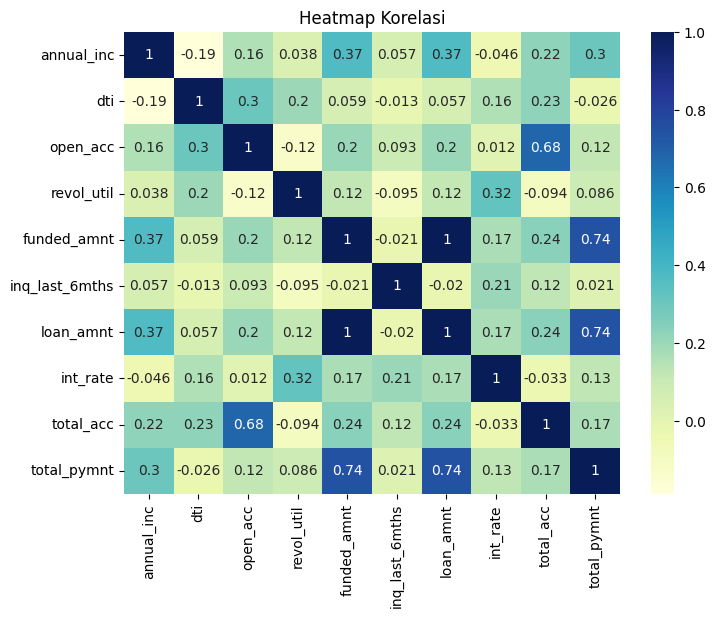

In [ ]:
# melakukan heatmap, untuk melihat korelasi antar variabel
nums = list(df1.select_dtypes(exclude='object').columns)
corr = df1[nums].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr,vmax=1, annot=True, cmap='YlGnBu')
plt.title('Heatmap Korelasi')
plt.show()

Dari grafik di atas terdapat vara\iabel yang redundan atau diatas 0.7 yaitu kolom total_pymnt

In [ ]:
df1 = df1.drop(['total_pymnt'], axis=1)

## Data Preprocessing

### Mengatasi nilai null

In [ ]:
print('Persentase nilai null:')
print((df1.isna().sum() / len(df1)) * 100)

Persentase nilai null:
term                   0.000000
grade                  0.000000
sub_grade              0.000000
home_ownership         0.000000
annual_inc             0.000858
dti                    0.000000
open_acc               0.006219
revol_util             0.072917
funded_amnt            0.000000
emp_length             4.505399
inq_last_6mths         0.006219
loan_status            0.000000
verification_status    0.000000
loan_amnt              0.000000
int_rate               0.000000
total_acc              0.006219
dtype: float64


Karena persentase nilai null kurang dari 10 % maka nilai null dapat di hapus.

In [ ]:
df1 = df1.dropna()

### Mengatasi nilai outlier

In [ ]:
# membuang nilai outlier menggunakan iqr
nums = list(df1.select_dtypes(exclude ='object').columns)
for i in nums:
    Q1 = df1[i].quantile(.25)
    Q3 = df1[i].quantile(.75)
    IQR = Q3 - Q1
    low = Q1 - (1.5 * IQR)
    high = Q3 + (1.5 * IQR)
    filter_data = ((df1[i] >= low) & (df1[i] <= high))
    df1_clean = df1[filter_data]

print('Sebelum Dibuang Outlier', df1.shape)
print('Setelah Dibuang Outlier', df1_clean.shape)


Sebelum Dibuang Outlier (444949, 16)
Setelah Dibuang Outlier (436607, 16)


### Melakukan Feature Extraction

In [ ]:
### menggabungkan nilai pada variabel loan_status

def credit_risk(loan_status):
    if loan_status == 'Current' or loan_status == 'Full Paid' or loan_status == 'Does not meet the credit policy.Status:Fully Paid':
        return 'Low Risk'
    else:
        return 'High Risk'

df1['Credit_risk'] = df1['loan_status'].apply(credit_risk)

In [ ]:
df1['loan_status'].drop

<bound method Series.drop of 0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4             Current
             ...     
466280        Current
466281    Charged Off
466282        Current
466283     Fully Paid
466284        Current
Name: loan_status, Length: 444949, dtype: object>

In [ ]:
# menyatukan nilai
df1['home_ownership'] = df1['home_ownership'].replace({'NONE': 'RENT', 'ANY': 'OWN'})

In [ ]:
# Mengurutkan nilai
custom_subgrade = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
                'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
                'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
                'G1', 'G2', 'G3', 'G4', 'G5']
df1['sub_grade'] = sorted(df1['sub_grade'], key=lambda x: custom_subgrade.index(x))

custom_grade = ['A','B','C','D','E','F','G']

df1['grade'] = sorted(df1['grade'], key=lambda x: custom_grade.index(x))


In [ ]:
# Mengurutkan nilai
custom_emp = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
df1['emp_length'] = sorted(df1['emp_length'], key=lambda x: custom_emp.index(x))


### Melakuakn Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
# label yang memiiki kelas
label_encoder = LabelEncoder()

df1['grade'] = label_encoder.fit_transform(df1['grade'])

df1['sub_grade'] = label_encoder.fit_transform(df1['sub_grade'])

df1['term'] = label_encoder.fit_transform(df1['term'])
df1['emp_length'] = label_encoder.fit_transform(df1['emp_length'])


In [ ]:
mapping = {'Low Risk': 0,'High Risk':1}
df1['credit_risk'] = df1['Credit_risk'].map(mapping)

In [ ]:
# Label tidak memiliki kelas
df_encoded = pd.get_dummies(df1[['home_ownership', 'verification_status',]])
df_encoded = df_encoded.astype(int)



In [ ]:
df_combined = pd.concat([df1, df_encoded], axis=1)
df1 = df_combined
df1.sample(5)

,term,grade,sub_grade,home_ownership,annual_inc,dti,open_acc,revol_util,funded_amnt,emp_length,...,total_acc,Credit_risk,credit_risk,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
286731,0,2,12,RENT,37400.0,5.13,3.0,84.7,8000,8,...,6.0,Low Risk,0,0,0,0,1,0,0,1
228783,0,2,10,RENT,52000.0,21.37,16.0,56.4,12000,6,...,31.0,High Risk,1,0,0,0,1,1,0,0
335647,0,2,14,MORTGAGE,75000.0,19.89,9.0,96.0,12100,1,...,32.0,Low Risk,0,1,0,0,0,0,0,1
72689,1,0,4,MORTGAGE,40000.0,25.74,8.0,69.2,14500,2,...,23.0,Low Risk,0,1,0,0,0,0,1,0
309630,1,2,13,RENT,95000.0,18.99,27.0,16.3,28000,1,...,53.0,High Risk,1,0,0,0,1,0,0,1


In [ ]:
df1 = df1.drop(['home_ownership', 'loan_status','verification_status','Credit_risk'], axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444949 entries, 0 to 466284
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term                                 444949 non-null  int64  
 1   grade                                444949 non-null  int64  
 2   sub_grade                            444949 non-null  int64  
 3   annual_inc                           444949 non-null  float64
 4   dti                                  444949 non-null  float64
 5   open_acc                             444949 non-null  float64
 6   revol_util                           444949 non-null  float64
 7   funded_amnt                          444949 non-null  int64  
 8   emp_length                           444949 non-null  int64  
 9   inq_last_6mths                       444949 non-null  float64
 10  loan_amnt                            444949 non-null  int64  
 11  int_rate          

### Mengatasi Class Imbalance

<ipython-input-40-81f302c3123b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='credit_risk', palette='rocket')


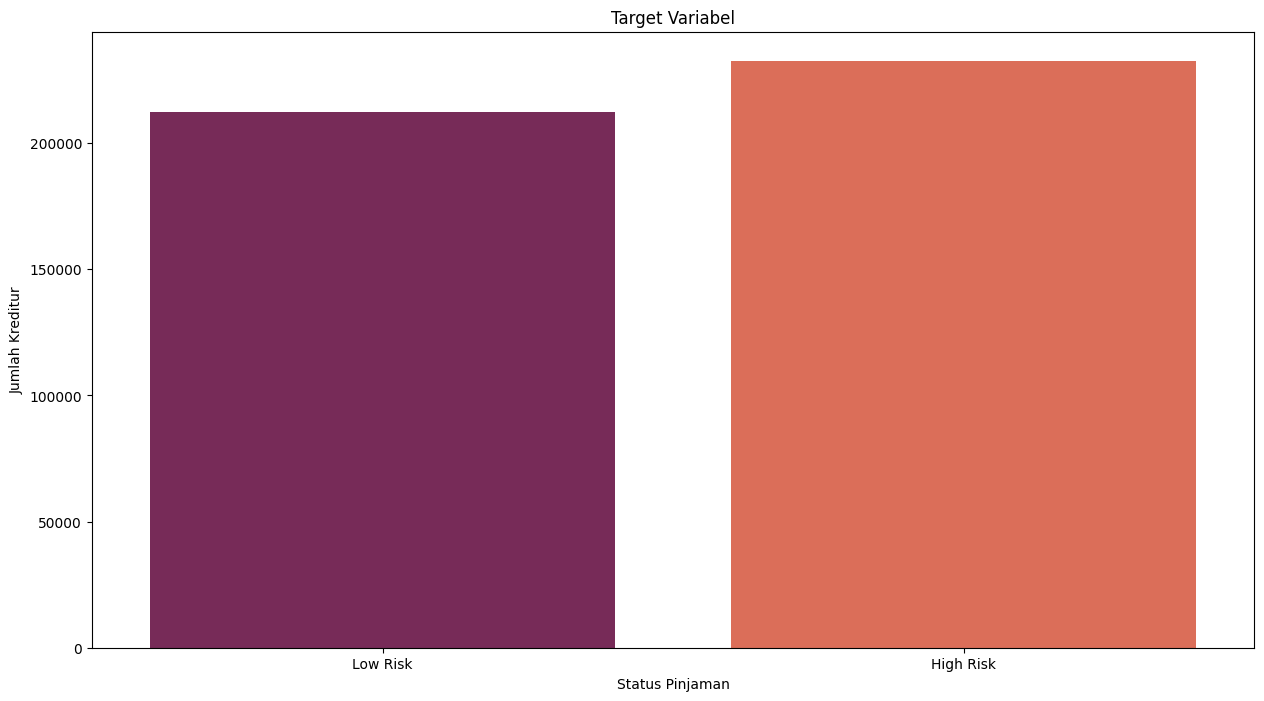

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df1, x='credit_risk', palette='rocket')
plt.title('Target Variabel')
plt.xticks(ticks=[0, 1], labels=['Low Risk', 'High Risk'])
plt.ylabel('Jumlah Kreditur')
plt.xlabel('Status Pinjaman')
plt.show()

In [ ]:
df1['credit_risk'].value_counts() / len(df) * 100

credit_risk
1    49.863496
0    45.560762
Name: count, dtype: float64

Berdasarkan informasi di atas pada data ini tidak terjadi ketimpangan yang tinggi, dimana nilai high risk dan low risk hanya memiliki selisih sebear 4 %. Sehingga tidak dibutuhkan penanganan




### Normalization




In [ ]:
#Split data train test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df1.drop(['credit_risk'], axis=1)
y = df1['credit_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (296632, 20)
Shape of X_test: (148317, 20)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

## Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import silhouette_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
## Model Evaluasi
def eval_classification(model):
    y_pred = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    y_pred_proba_train = model.predict_proba(X_train_scaled)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))


In [ ]:
## confusion matrix
def c_matrix_plot(y_test, y_pred):

    c_matrix = confusion_matrix(y_test, y_pred)
    names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ['{0:0.0f}'.format(value) for value in c_matrix.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    ax = sns.heatmap(c_matrix, annot = labels, fmt = '', cmap = 'mako')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['High Risk', 'Low Risk'])
    ax.yaxis.set_ticklabels(['High Risk', 'Low Risk'])
    plt.show()


In [ ]:
%matplotlib


models = {
    "Logistic"   : LogisticRegression(random_state = 42),
    "DT"         : DecisionTreeClassifier(random_state = 42),
    "RF"         : RandomForestClassifier(random_state = 42),
    "XGB"        : XGBClassifier(random_state = 42),
    "ADB"        : AdaBoostClassifier(random_state = 42),

}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("Evaluate model: {}".format(model_name))
    print(eval_classification(model), "\n")

Using matplotlib backend: <object object at 0x7fe5d55ab670>
Evaluate model: Logistic
Accuracy (Test Set): 0.65
Precision (Test Set): 0.65
Recall (Train Set): 0.71
Recall (Test Set): 0.71
F1-Score (Train Set): 0.68
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.70
None 

Evaluate model: DT
Accuracy (Test Set): 0.63
Precision (Test Set): 0.65
Recall (Train Set): 1.00
Recall (Test Set): 0.65
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.65
roc_auc (test-proba): 0.63
roc_auc (train-proba): 1.00
None 

Evaluate model: RF
Accuracy (Test Set): 0.69
Precision (Test Set): 0.74
Recall (Train Set): 1.00
Recall (Test Set): 0.64
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.69
roc_auc (test-proba): 0.77
roc_auc (train-proba): 1.00
None 

Evaluate model: XGB
Accuracy (Test Set): 0.70
Precision (Test Set): 0.75
Recall (Train Set): 0.67
Recall (Test Set): 0.65
F1-Score (Train Set): 0.72
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.78
roc_auc (train-proba): 0

Dari modeling singkat diatas, XGBoost,Adaboost dan Logistic Regression memiliki nilai yang cukup baik dan tidak memiliki over fitting. Maka dari itu XGBoost, Adaboost dan Logistic Regression akan dilakukan hyperparameter tuning untuk mengurangi overfitting.

### Hyperpameter Tuning Logistic Regression

In [ ]:
## Hyperparameter turning Logistic Reggresion
params_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]}

lr = LogisticRegression()
lr_rs = RandomizedSearchCV(lr, params_logistic, scoring= 'recall', cv=5)
lr_rs.fit(X_train_scaled, y_train)
eval_classification(lr_rs)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Accuracy (Test Set): 0.65
Precision (Test Set): 0.65
Recall (Train Set): 0.72
Recall (Test Set): 0.72
F1-Score (Train Set): 0.68
F1-Score (Test Set): 0.68
roc_auc (test-proba): 0.70
roc_auc (train-proba): 0.70


### Hyperparameter Tuning XGBoost

In [ ]:
hyperparameters = {
                    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.]
                    }

# Init model
xgb = XGBClassifier(random_state=42)
xgb_tuned = RandomizedSearchCV(xgb, hyperparameters, cv=5, scoring=make_scorer(f1_score))
xgb_tuned.fit(X_train_scaled,y_train)

# Predict & Evaluation
eval_classification(xgb_tuned)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.73
Recall (Train Set): 0.67
Recall (Test Set): 0.66
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.78
roc_auc (train-proba): 0.78


In [ ]:
#Hyperparameter tuning Adaboost
# List of hyperparameter
hyperparameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
}

# Init model
ab = AdaBoostClassifier(random_state=42)
model_ab = RandomizedSearchCV(ab, hyperparameters, cv=5, scoring=make_scorer(f1_score))
model_ab.fit(X_train_scaled,y_train)

# Predict & Evaluation
eval_classification(model_ab)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Accuracy (Test Set): 0.69
Precision (Test Set): 0.71
Recall (Train Set): 0.69
Recall (Test Set): 0.69
F1-Score (Train Set): 0.70
F1-Score (Test Set): 0.70
roc_auc (test-proba): 0.76
roc_auc (train-proba): 0.76


Berdasarkan hasil modeling yang telah di lakukan, Model XGBoost memiliki angka tertinggi dan tidak overfitting.

## Feature Importance

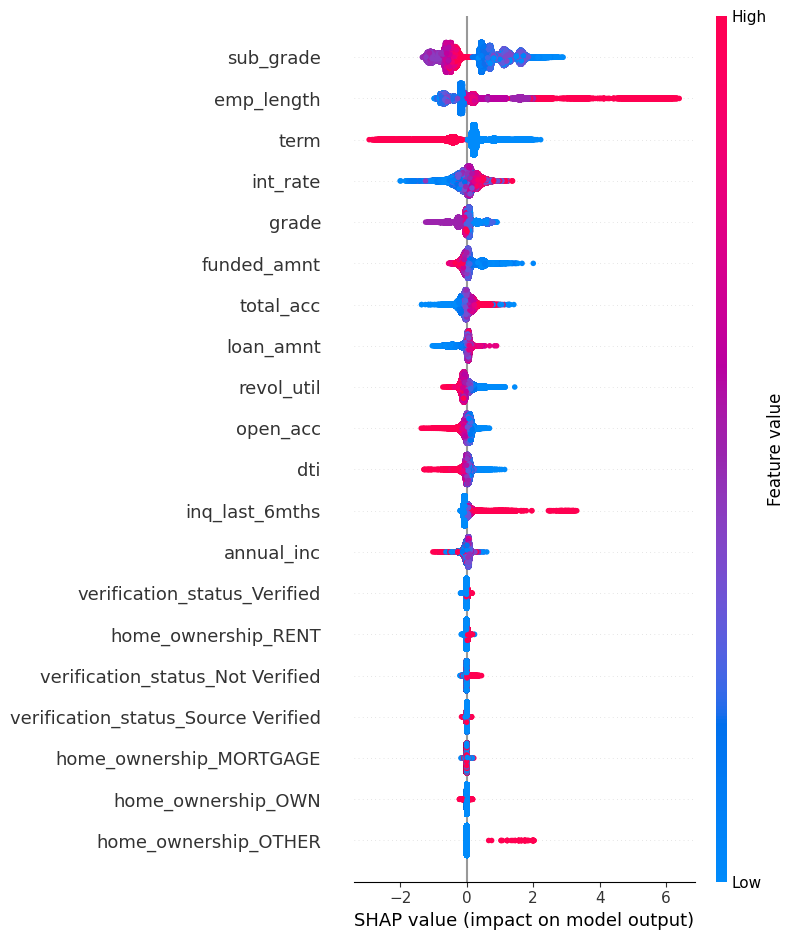

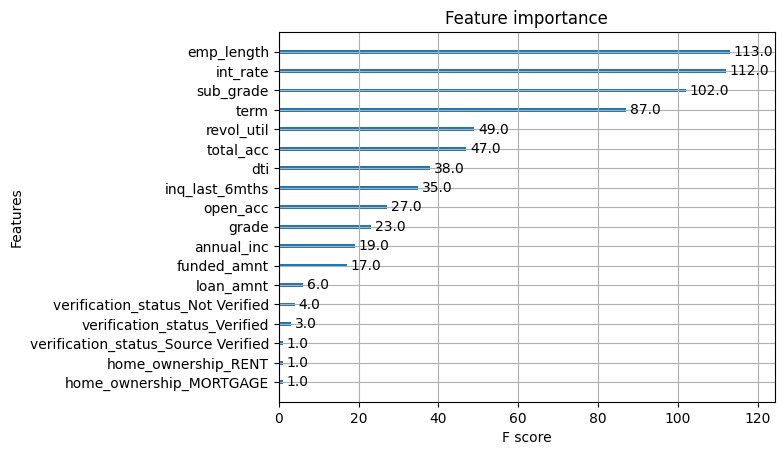

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

def show_feature_importance(xgb_model):
    # Gunakan plot_importance dari XGBoost untuk menampilkan fitur penting
    plot_importance(xgb_model)
    plt.show()

# Sebelum menggunakan fungsi, pastikan Anda sudah melatih model XGBoost (xgb_model) terlebih dahulu
# Misalnya:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)

# Sekarang, panggil fungsi show_feature_importance dengan model XGBoost yang telah dilatih
show_feature_importance(xgb_model)

In [ ]:
df_test = X_test.copy()
df_test ['credit_risk'] = y_test
df_test_high = df_test[df_test['credit_risk'] == 1]
print('Jumlah Nasabah Yang Terindikasi High Risk SEbelum Model:', df_test_high['credit_risk'].value_counts())

Jumlah Nasabah Yang Terindikasi High Risk SEbelum Model: credit_risk
1    77682
Name: count, dtype: int64


In [ ]:
df_pred = X_test.copy()
df_pred['credit_risk'] = y_pred
df_pred_high = df_pred[df_pred['credit_risk'] == 1]
print('Jumlah Nasabah Yang Terindikasi High Risk Setelah Model:', df_pred_high['credit_risk'].value_counts())

Jumlah Nasabah Yang Terindikasi High Risk Setelah Model: credit_risk
1    68915
Name: count, dtype: int64


## Data Insight

In [ ]:
data_insight = df[['term','grade','home_ownership','annual_inc','funded_amnt','loan_status']]

In [ ]:
#mengelompokan status pinjaman
def credit_risk(loan_status):
    if loan_status == 'Current' or loan_status == 'Full Paid' or loan_status == 'Does not meet the credit policy.Status:Fully Paid':
        return 'Low Risk'
    else:
        return 'High Risk'

data_insight['credit_risk'] = data_insight['loan_status'].apply(credit_risk)

In [ ]:
# mengelompokan pendapatan
def annual_income(annual_inc):
    if annual_inc <= 45000.0:
      return '1896.0 - 45000.0'
    elif annual_inc <= 88960.0:
      return '46000.0-88960.0'
    else:
        return 'above 88960.0'

data_insight['cat_income'] = data_insight['annual_inc'].apply(annual_income)

In [ ]:
## Data Insight Kepemilikan Rumah Dengan Resiko Kredit
palette = {'High Risk': 'maroon', 'Low Risk': 'coral'}

plt.figure(figsize=(15, 8))
sns.countplot(data=data_insight, x='home_ownership', hue='credit_risk',order=data_insight['home_ownership'].value_counts().index, palette=palette)
plt.title('Jumlah Kepemilikan Rumah Berdasarkan Resiko Kredit', size=15)
plt.ylabel('Jumlah Nasabah', size=12)
plt.xlabel('Status Kepemilikan Rumah', size=12)
plt.show()

In [ ]:
## Data Insight Pendapatan Tahunan Berdasarkan Resiko Kredit
palette = {'High Risk': 'maroon', 'Low Risk': 'coral'}

plt.figure(figsize=(15, 8))
sns.countplot(data=data_insight, x='cat_income', hue='credit_risk',order=data_insight['cat_income'].value_counts().index, palette=palette)
plt.title('Jumlah Pendapatan Tahunan Berdasarkan Resiko Kredit', size=15)
plt.ylabel('Jumlah Nasabah', size=12)
plt.xlabel('Kategori Pendapatan', size=12)
plt.show()

In [ ]:
## Jangka waktu Peminjaman Berdasarkan Resiko Kredit
palette = {'High Risk': 'maroon', 'Low Risk': 'coral'}

plt.figure(figsize=(15, 8))
sns.countplot(data=data_insight, x='term', hue='credit_risk',order=data_insight['term'].value_counts().index, palette=palette)
plt.title('Jumlah Jangka Waktu Peminjaman Berdasarkan Resiko Kredit', size=15)
plt.ylabel('Jumlah Nasabah', size=12)
plt.xlabel('Jangka Waktu Peminjaman', size=12)
plt.show()